# Feature Engineering
Starting dataset consists of daily candle stick data for a certain ticker and a certain time period

In [48]:
import pandas as pd
import numpy as np
import time, datetime
import math

In [3]:
import pandas_datareader as web

C:\Users\Eddie\Anaconda3\envs\tensorflow\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
ticker = 'VBIV'
start_date = '2019-01-01'
end_date = datetime.date.today()

In [6]:
df = web.DataReader(ticker, data_source = 'yahoo', start = start_date, end = end_date).reset_index()
df['Symbol'] = ticker

In [12]:
import matplotlib.pyplot as plt

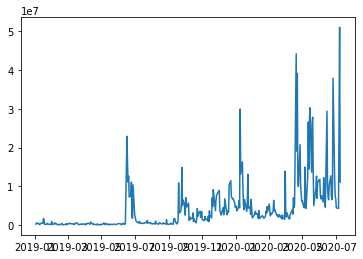

In [14]:
plt.plot(df['Date'], df['Volume'])

In [17]:
volume20 = df.iloc[:20, df.columns.get_loc('Volume')]

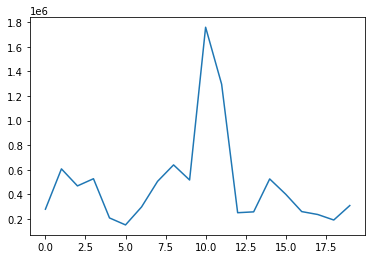

In [18]:
plt.plot(volume20)

## Feature1: Average Volume over 20 day period

In [19]:
df['Avg_Vol_20'] = -1
for row in range(20, df.shape[0]):
    df.iloc[row, -1] = np.mean(df.iloc[row-20:row, df.columns.get_loc('Volume')])

## Feature2: Daily Volume to Avg Volume Ratio

In [21]:
df['Vol_Ratio1'] = df['Volume'] / df['Avg_Vol_20']

## Feature3: Open:PrevClose Ratio

In [35]:
df['Open/Close'] = -1
for row in range(1, df.shape[0]):
    df.iloc[row,-1] = df.iloc[row, df.columns.get_loc('Open')] / df.iloc[row-1, df.columns.get_loc('Close')]

## Feature4: daily Low/Open Ratio 

In [37]:
df['Low/Open'] = df['Low'] / df['Open']

## Feature5: daily High/Open Ratio 

In [44]:
df['High/Open'] = df['High'] / df['Open']

## Feature6: Daily Log Return

In [53]:
df['DailyLogReturn'] = -1
for row in range(1, df.shape[0]):
    df.iloc[row, -1] = math.log(df.iloc[row, df.columns.get_loc('Close')] / df.iloc[row-1, df.columns.get_loc('Close')])

## Feature7: Squared Daily Log Return

In [55]:
df['SquaredDailyLogReturn'] = df['DailyLogReturn']**2

## Feature8: exponential weights for feature7 

In [54]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Symbol,Avg_Vol_20,Vol_Ratio1,Open/Close,Low/Open,High/Open,DailyLogReturn
0,2019-01-02,1.70,1.56,1.56,1.65,278989,1.65,VBIV,-1.0,-278989.0,-1.000000,1.000000,1.089744,-1.000000
1,2019-01-03,1.69,1.57,1.65,1.62,606915,1.62,VBIV,-1.0,-606915.0,1.000000,0.951515,1.024242,-0.018349
2,2019-01-04,1.67,1.56,1.64,1.63,468436,1.63,VBIV,-1.0,-468436.0,1.012346,0.951219,1.018293,0.006154
3,2019-01-07,1.75,1.58,1.62,1.68,526842,1.68,VBIV,-1.0,-526842.0,0.993865,0.975309,1.080247,0.030214
4,2019-01-08,1.68,1.54,1.68,1.58,207943,1.58,VBIV,-1.0,-207943.0,1.000000,0.916667,1.000000,-0.061369


## Suppor and Resistance Levels

In [42]:
price20 = df.iloc[:100, df.columns.get_loc('Close')]

Text(0, 0.5, 'Stock Price')

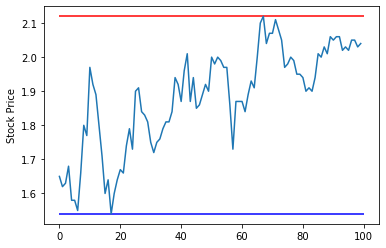

In [63]:
plt.plot(price20)
plt.hlines(min(price20), 0, 100, colors = 'b')
plt.hlines(max(price20), 0 ,100, colors = 'r')
plt.ylabel('Stock Price')